## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
# # # download the data
# import wget
# url = "https://raw.githubusercontent.com/waccoco/2024_NCTU_MI_course/master/Dataset/Salary_Data2.csv"
# output_path = './Salary_Data2.csv'
# wget.download(url, out=output_path)

In [23]:
import pandas as pd

output_path = '../Salary_Data2.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7


In [24]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  36 non-null     float64
 1   EducationLevel   36 non-null     object 
 2   City             36 non-null     object 
 3   Salary           36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


,YearsExperience,EducationLevel,City,Salary
count,36.00,36,36,36.00
unique,NaN,3,3,NaN
top,NaN,碩士以上,城市A,NaN
freq,NaN,16,20,NaN
mean,5.47,NaN,NaN,51.70
std,2.71,NaN,NaN,17.53
min,1.20,NaN,NaN,24.90
25%,3.38,NaN,NaN,38.05
50%,5.15,NaN,NaN,49.20
75%,7.65,NaN,NaN,65.75


## Transform the Categorical data to numerical data
### @ LabelEncoder：把類別型資料轉換成0,1,2,…的數值標籤 (特徵之間有順序或大小分別)
   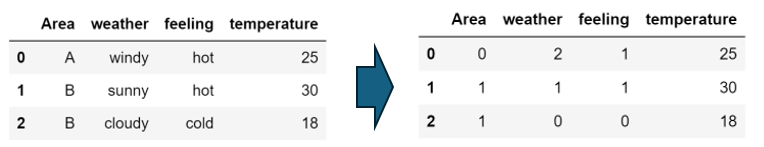

### @ OneHotEncoder：把類別型資料轉換成0與1的數值標籤 (特徵之間沒有順序或大小分別)
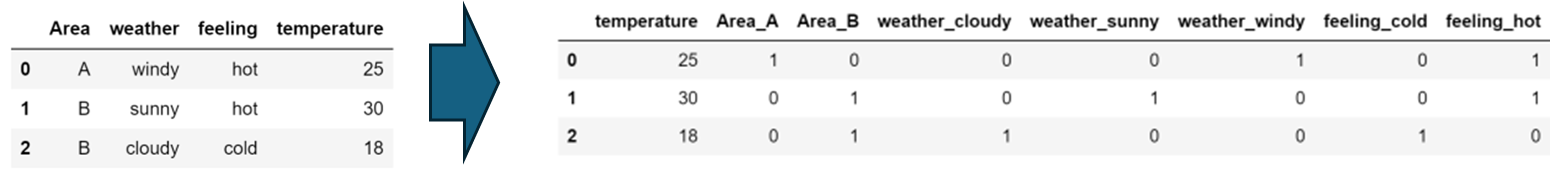

### Exercise : Try to use the one-hot encoder to encode the Categorical data into numerical data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

########################################################
df_encoded = pd.get_dummies(df, columns=['EducationLevel', 'City'])
# 假設df是已經通過get_dummies轉換後的DataFrame，且包含布林值
# 轉換布林值為整數
df_encoded = df_encoded.astype(int)
########################################################

# 顯示轉換後的DataFrame
display(df_encoded.head(5))

NameError: name 'df' is not defined

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

encoder = OneHotEncoder()
city_encoded = encoder.fit_transform(df[['City']]).toarray()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['YearsExperience', 'Salary']])

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['EducationLevel'])
# labels = encoder.fit_transform(df[['EducationLevel']]).toarray()

#### 為何這裡不能用one hot ???


x = np.hstack([scaled_features, city_encoded])
y = labels
# display(x.head(5))


In [41]:
display(y)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [42]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

##  data visualization


## Build ANN model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(8, input_shape=(x.shape[1],), activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Training ANN model

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(6,) and logits.shape=(2, 3)


## Model evaluation

In [31]:
history.history['loss'][:10]

[1.0651400089263916,
 0.9785123467445374,
 0.9198969006538391,
 0.8695665597915649,
 0.8232746720314026,
 0.7889606952667236,
 0.7633535861968994,
 0.7465541958808899,
 0.7115244269371033,
 0.688393771648407]

1/1 [==============================] - 0s 429ms/step - loss: 0.0025 - accuracy: 1.0000


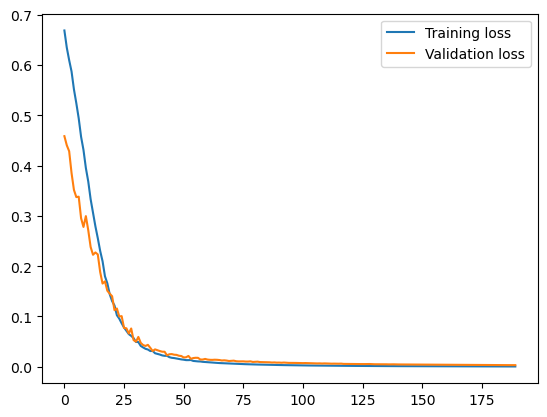

In [32]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy*100}%')


1/1 [==============================] - 0s 56ms/step - loss: 0.0025 - accuracy: 1.0000
Accuracy: 100.0%


In [34]:
y_pred = model.predict(x_test)
print((y_pred),(y_test))

1/1 [==============================] - 0s 182ms/step
[[7.4350485e-04 9.9099201e-01 8.2643796e-03]
 [9.9712402e-01 8.3652342e-04 2.0393608e-03]
 [4.5790970e-03 9.9530274e-01 1.1820064e-04]
 [9.9998528e-01 2.3830721e-06 1.2224081e-05]
 [9.9881715e-01 5.3330552e-04 6.4954086e-04]
 [6.3469341e-09 9.9999982e-01 7.7632706e-08]
 [3.2354667e-04 9.9802113e-01 1.6552852e-03]
 [5.0737752e-05 1.3356861e-06 9.9994785e-01]] [1 0 1 0 0 1 1 2]


1/1 [==============================] - 0s 70ms/step


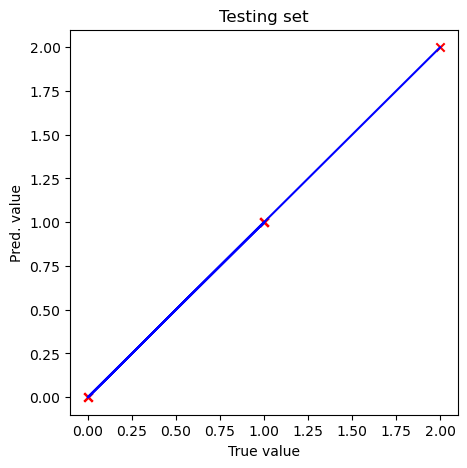

1/1 [==============================] - 0s 62ms/step


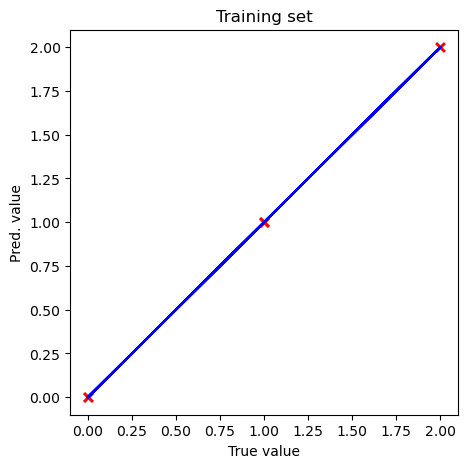

In [35]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)

plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


In [36]:
y_train

array([2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 1, 0])

In [37]:
print(len(x_train),len(y_pred))

28 28


In [38]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_train, y_pred)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 0s 67ms/step
Confusion Matrix:
[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  7]]


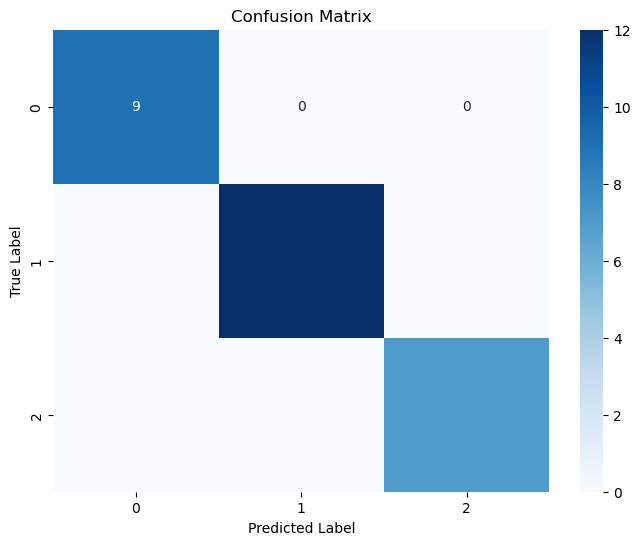

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 322ms/step


ValueError: x and y must be the same size

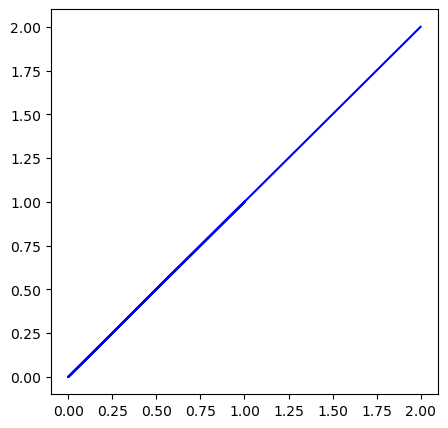

In [11]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


In [71]:
print((y_train))
print(x_train,y_pred)

3     30
0     45
35    36
24    48
18    26
8     40
5     60
21    78
29    41
22    63
31    60
9     28
19    31
7     70
1     80
10    32
6     50
11    48
28    29
30    76
27    24
14    62
25    68
15    55
12    84
4     65
16    72
26    38
Name: Salary, dtype: int32
    YearsExperience  EducationLevel_大學  EducationLevel_碩士以上  City_城市A  \
3                 5                  0                    0         1   
0                 3                  1                    0         1   
35                4                  1                    0         1   
24                8                  1                    0         0   
18                2                  0                    0         1   
8                 4                  1                    0         1   
5                 1                  0                    1         0   
21                7                  0                    1         0   
29                3                  1                    0     

1/1 [==============================] - 0s 45ms/step


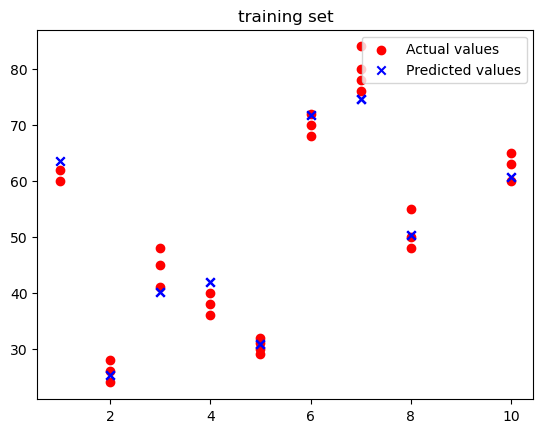

1/1 [==============================] - 0s 61ms/step


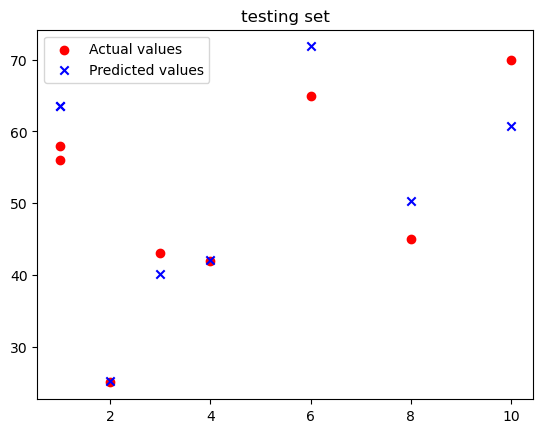

In [75]:
y_pred = model.predict(x_train)
plt.scatter(x_train['YearsExperience'], y_train, color='red', label='Actual values')
plt.scatter(x_train['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Actual values')
plt.scatter(x_test['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [73]:
## coefficient of determination, denoted R2
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)

y_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_pred)

print(r2_train, r2_test)

1/1 [==============================] - 0s 64ms/step
0.959663983224341 0.826955595157973


In [74]:
## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]
y_pred = model.predict(x_train)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]
print(psc_test, psc_train)

1/1 [==============================] - 0s 56ms/step
0.9281169184929442 0.9808791382490734
